# Points for PPT
<h3 style='margin-bottom: 40px;'><b>Link to Doc containing PPT Points</b></h3>

* [Traffic Optimization](https://docs.google.com/document/d/1AaKhy1MtRbga2mrrWWxrlfmGjwQwv_VigT8ni7ROfro/edit?usp=sharing)

## Network with 12 cities


Initial Network Analysis

Initial Network Statistics
Total number of routes: 16
Total network flow: 1848
Total network capacity: 2620
Overall network utilization: 70.5%
Number of congested routes: 8

Congested routes:
Dublin -> Drogheda: 84.0% utilized
Dublin -> Dundalk: 81.8% utilized
Dublin -> Athlone: 90.0% utilized
Dublin -> Kilkenny: 90.0% utilized
Dublin -> Wexford: 90.0% utilized
Cork -> Waterford: 90.0% utilized
Cork -> Limerick: 90.0% utilized
Limerick -> Galway: 90.0% utilized


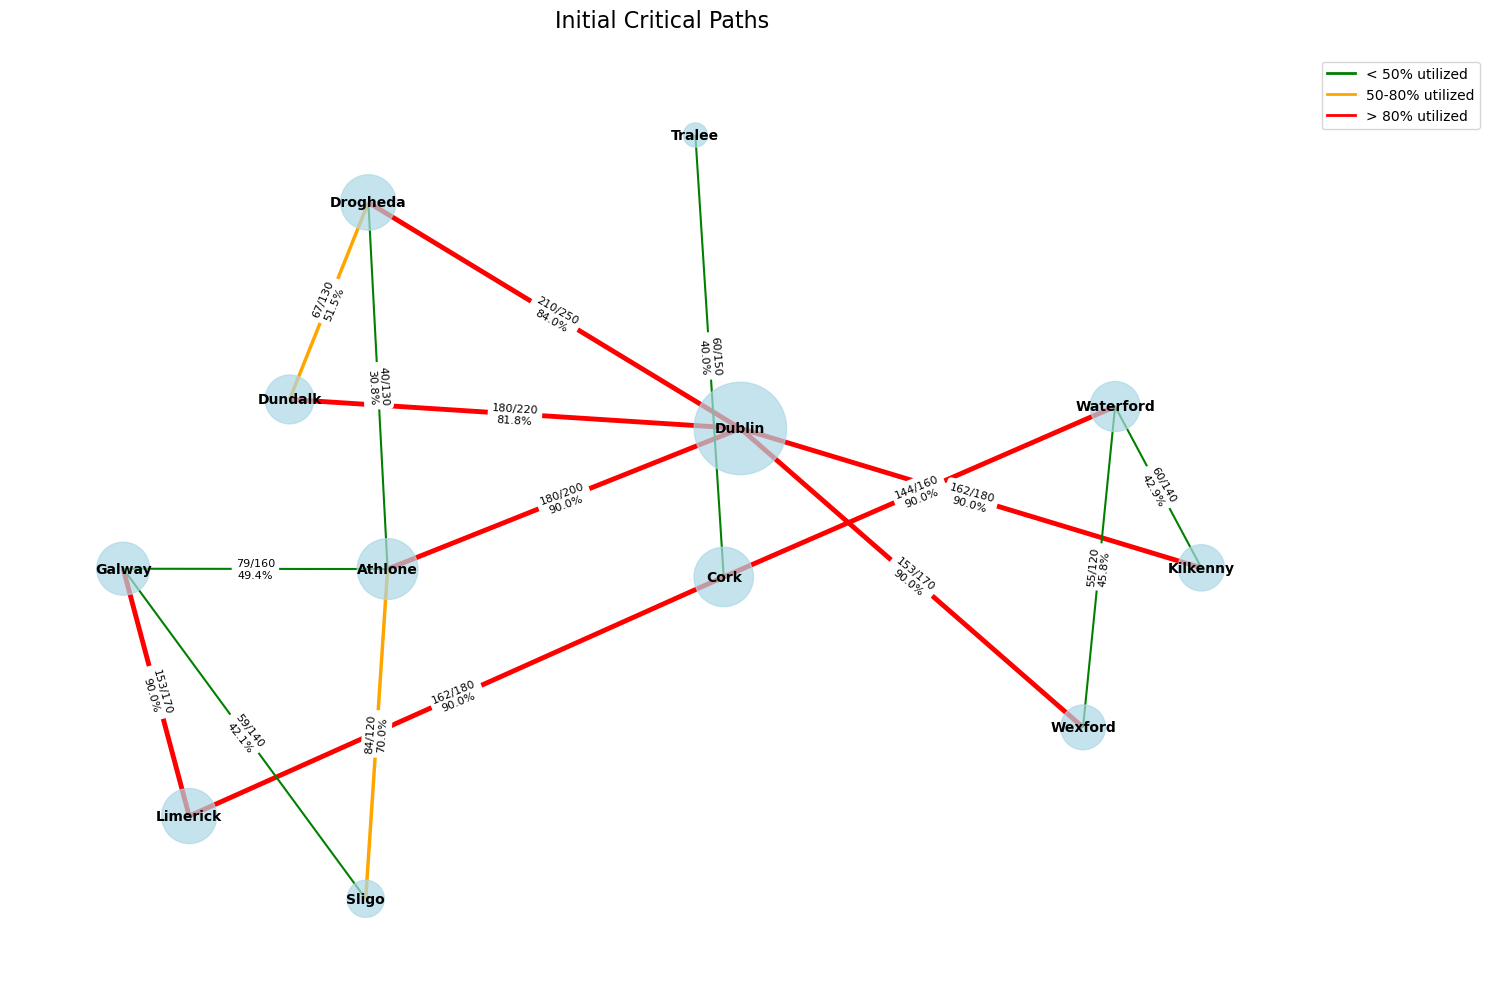


Optimized Network Analysis

Optimized Network Statistics
Total number of routes: 16
Total network flow: 2006
Total network capacity: 2620
Overall network utilization: 76.6%
Number of congested routes: 4

Congested routes:
Dublin -> Drogheda: 100.0% utilized
Dublin -> Dundalk: 100.0% utilized
Dublin -> Athlone: 87.0% utilized
Dublin -> Kilkenny: 100.0% utilized


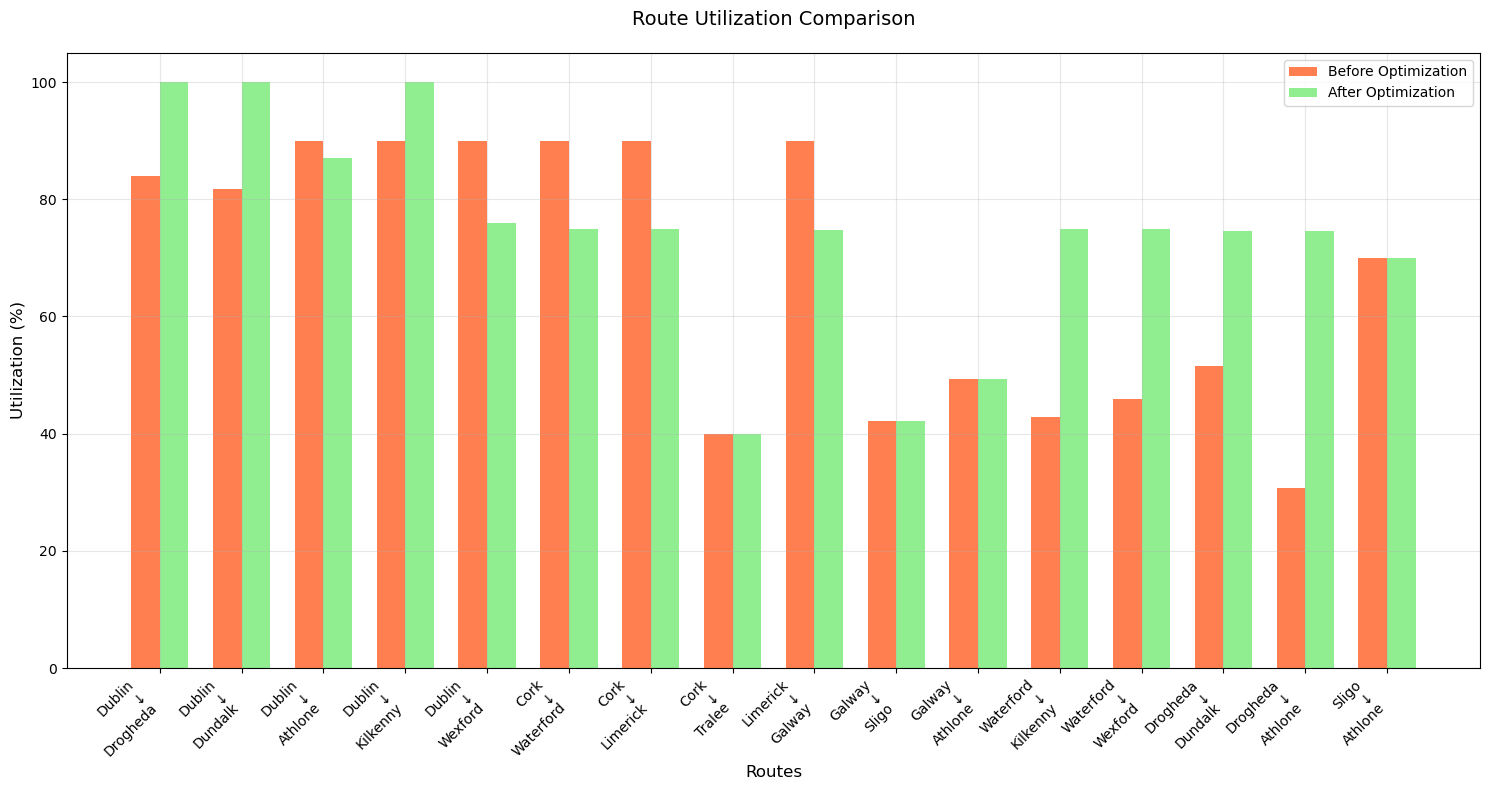

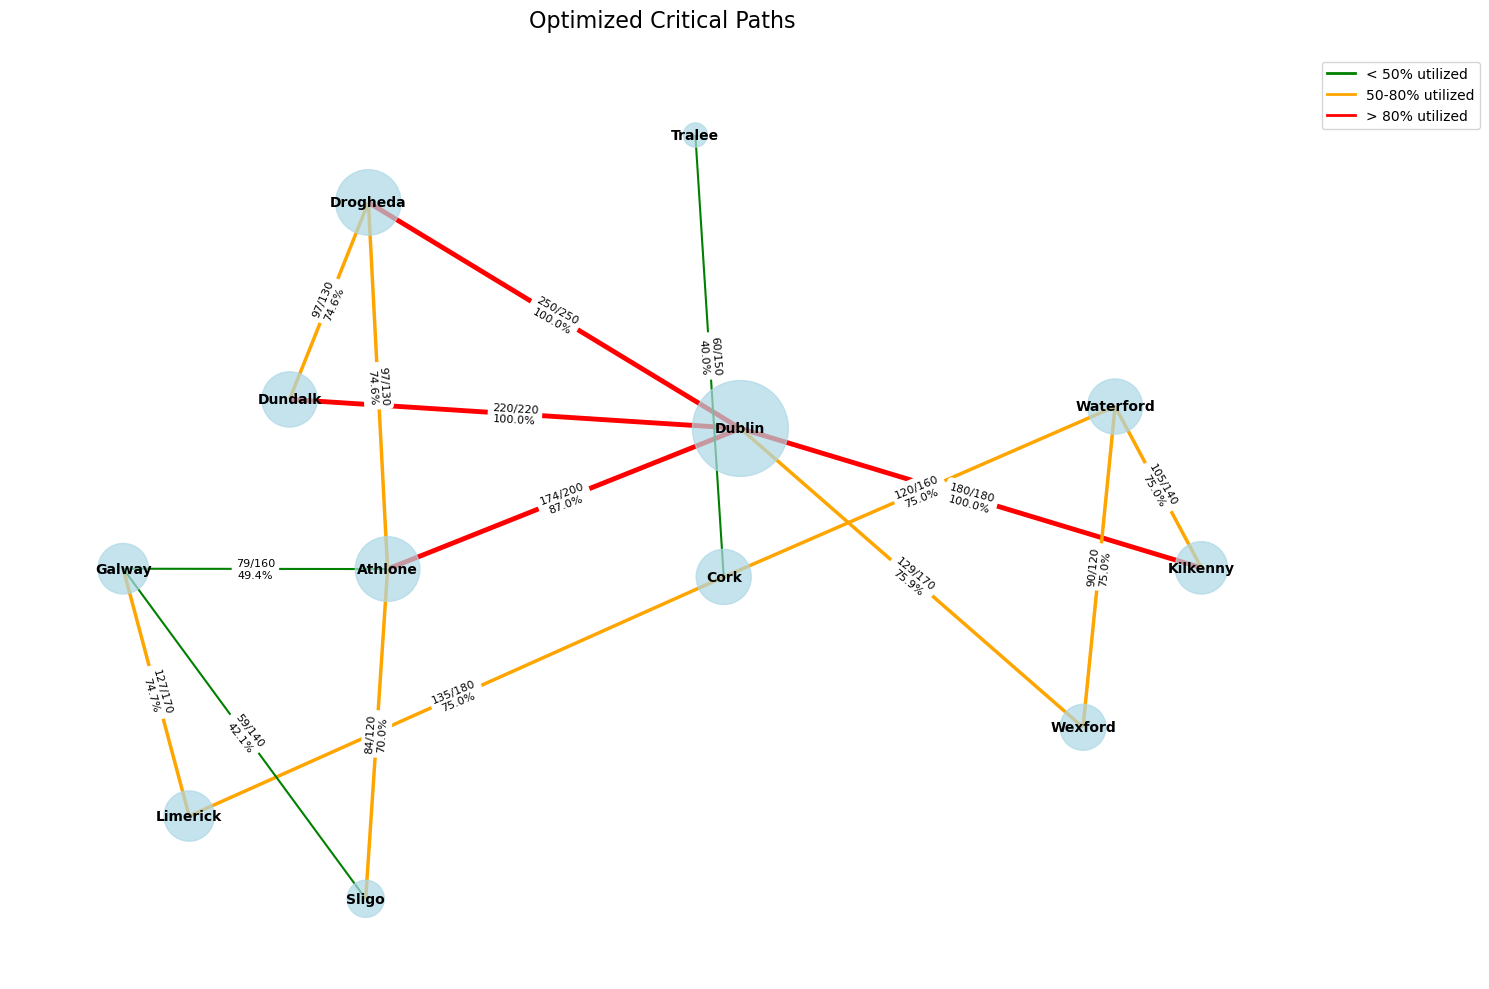

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Define 12 Irish cities
irish_cities = [
    'Dublin', 'Cork', 'Limerick', 'Galway', 'Waterford', 'Drogheda',
    'Kilkenny', 'Sligo', 'Tralee', 'Athlone', 'Wexford', 'Dundalk'
]

def create_traffic_network():
    G = nx.Graph()
    
    # Add nodes (cities) with specific traffic loads
    city_loads = {
        'Dublin': 200,    # Capital city
        'Cork': 150,      # Second largest city
        'Limerick': 120,  # Major western city
        'Galway': 130,    # Western hub
        'Waterford': 100, # Southeastern city
        'Drogheda': 90,   # Northern commuter town
        'Kilkenny': 85,   # Medieval city
        'Sligo': 80,      # Northwestern hub
        'Tralee': 75,     # Kerry hub
        'Athlone': 95,    # Central hub
        'Wexford': 85,    # Southeastern port
        'Dundalk': 88     # Border town
    }
    
    for city, load in city_loads.items():
        G.add_node(city, traffic_load=load)
    
    # Add edges (roads) with specific capacities and flows
    # Format: (city1, city2, capacity, current_flow)
    road_data = [
         # Major Dublin routes
        ('Dublin', 'Drogheda', 250, 210),    # M1 route
        ('Dublin', 'Dundalk', 220, 180),     # M1 extension
        ('Dublin', 'Athlone', 200, 180),     # M4/N4 route
        ('Dublin', 'Kilkenny', 180, 162),    # M9/N9 route
        ('Dublin', 'Wexford', 170, 153),     # M11/N11 route
        
         # Major inter-city routes
        ('Cork', 'Waterford', 160, 144),     # N25 route
        ('Cork', 'Limerick', 180, 162),      # N20 route
        ('Limerick', 'Galway', 170, 153),    # M18 route
        
         # Other routes  
        ('Cork', 'Tralee', 150, 60),        # N22 route
        ('Galway', 'Sligo', 140, 59),        # N17 route
        ('Galway', 'Athlone', 160, 79),     # M6 route
        ('Waterford', 'Kilkenny', 140, 60), # N9 route
        ('Waterford', 'Wexford', 120, 55),   # N25 route
        ('Drogheda', 'Dundalk', 130, 67),    # M1 section
        ('Drogheda', 'Athlone', 130, 40),    # N51 route
        ('Sligo', 'Athlone', 120, 84)        # N4 route
    ]
    
    for city1, city2, capacity, flow in road_data:
        G.add_edge(city1, city2, capacity=capacity, current_flow=flow)
    
    return G

def plot_utilization_comparison(G_before, G_after):
    """Create a bar chart comparing route utilization before and after optimization"""
    routes = list(G_before.edges())
    utilization_before = []
    utilization_after = []
    
    for route in routes:
        util_before = (G_before[route[0]][route[1]]['current_flow'] / 
                      G_before[route[0]][route[1]]['capacity']) * 100
        util_after = (G_after[route[0]][route[1]]['current_flow'] / 
                     G_after[route[0]][route[1]]['capacity']) * 100
        utilization_before.append(util_before)
        utilization_after.append(util_after)
    
    plt.figure(figsize=(15, 8))
    x = np.arange(len(routes))
    width = 0.35
    
    plt.bar(x - width/2, utilization_before, width, label='Before Optimization', color='coral')
    plt.bar(x + width/2, utilization_after, width, label='After Optimization', color='lightgreen')
    
    plt.xlabel('Routes', fontsize=12)
    plt.ylabel('Utilization (%)', fontsize=12)
    plt.title('Route Utilization Comparison', pad=20, fontsize=14)
    plt.xticks(x, [f'{r[0]}\n↓\n{r[1]}' for r in routes], rotation=45, ha='right')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def plot_critical_paths(G, title):
    """Visualize critical paths with high utilization"""
    pos = nx.spring_layout(G, k=1.3, iterations=50, seed=42)
    
    plt.figure(figsize=(15, 10))
    plt.title(title, pad=20, size=16)
    
    # Draw nodes with size based on total traffic
    node_traffic = {node: sum(G[node][neighbor]['current_flow'] 
                            for neighbor in G[node]) 
                   for node in G.nodes()}
    node_sizes = [node_traffic[node] * 5 for node in G.nodes()]
    
    # Create custom colormap for edges based on utilization
    edge_colors = []
    edge_widths = []
    for (u, v) in G.edges():
        utilization = G[u][v]['current_flow'] / G[u][v]['capacity']
        if utilization < 0.5:
            edge_colors.append('green')
            edge_widths.append(1.5)
        elif utilization < 0.8:
            edge_colors.append('orange')
            edge_widths.append(2.5)
        else:
            edge_colors.append('red')
            edge_widths.append(3.5)
    
    # Draw the network
    nx.draw_networkx_nodes(G, pos, node_color='lightblue',
                          node_size=node_sizes, alpha=0.7)
    nx.draw_networkx_edges(G, pos, edge_color=edge_colors,
                          width=edge_widths)
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')
    
    # Add edge labels
    edge_labels = {(u, v): f'{G[u][v]["current_flow"]}/{G[u][v]["capacity"]}\n{(G[u][v]["current_flow"]/G[u][v]["capacity"]*100):.1f}%'
                  for (u, v) in G.edges()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=8)
    
    # Add legend
    legend_elements = [
        plt.Line2D([0], [0], color='green', lw=2, label='< 50% utilized'),
        plt.Line2D([0], [0], color='orange', lw=2, label='50-80% utilized'),
        plt.Line2D([0], [0], color='red', lw=2, label='> 80% utilized')
    ]
    plt.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1))
    
    plt.axis('off')
    plt.tight_layout()
    plt.show()

def optimize_traffic_flow(G):
    """Optimize traffic flow in the network"""
    def find_alternative_paths(G, start, end, max_depth=3):
        paths = []
        def dfs(current, target, path, depth):
            if depth > max_depth:
                return
            if current == target:
                paths.append(path)
                return
            for neighbor in G[current]:
                if neighbor not in path:
                    dfs(neighbor, target, path + [neighbor], depth + 1)
        dfs(start, end, [start], 0)
        return [p for p in paths if len(p) > 2]  # Only return indirect paths

    G_opt = G.copy()
    
    for (start, end) in list(G_opt.edges()):
        current_flow = G_opt[start][end]['current_flow']
        capacity = G_opt[start][end]['capacity']
        
        if current_flow > capacity * 0.8:
            # Calculate excess traffic
            target_flow = int(capacity * 0.75)
            excess_traffic = current_flow - target_flow
            G_opt[start][end]['current_flow'] = target_flow
            
            # Find alternative paths
            alt_paths = find_alternative_paths(G_opt, start, end)
            viable_paths = []
            
            # Calculate available capacity for each alternative path
            for path in alt_paths:
                min_available_capacity = float('inf')
                for i in range(len(path)-1):
                    edge_capacity = G_opt[path[i]][path[i+1]]['capacity']
                    edge_flow = G_opt[path[i]][path[i+1]]['current_flow']
                    available = edge_capacity - edge_flow
                    min_available_capacity = min(min_available_capacity, available)
                
                if min_available_capacity > 0:
                    viable_paths.append((path, min_available_capacity))
            
            # Distribute excess traffic more precisely
            if viable_paths:
                traffic_per_path = excess_traffic // len(viable_paths)
                remainder = excess_traffic % len(viable_paths)
                
                for i, (path, available_capacity) in enumerate(viable_paths):
                    extra = 1 if i < remainder else 0
                    traffic_to_add = min(traffic_per_path + extra, available_capacity)
                    
                    for j in range(len(path)-1):
                        G_opt[path[j]][path[j+1]]['current_flow'] += traffic_to_add
    
    return G_opt

def print_network_statistics(G, title):
    """Print detailed network statistics"""
    print(f"\n{title}")
    print("=" * 50)
    print(f"Total number of routes: {len(G.edges())}")
    
    total_flow = sum(G[u][v]['current_flow'] for u, v in G.edges())
    total_capacity = sum(G[u][v]['capacity'] for u, v in G.edges())
    
    print(f"Total network flow: {total_flow}")
    print(f"Total network capacity: {total_capacity}")
    print(f"Overall network utilization: {(total_flow/total_capacity)*100:.1f}%")
    
    congested_routes = [(u, v) for u, v in G.edges() 
                       if G[u][v]['current_flow']/G[u][v]['capacity'] > 0.8]
    print(f"Number of congested routes: {len(congested_routes)}")
    
    if congested_routes:
        print("\nCongested routes:")
        for u, v in congested_routes:
            util = (G[u][v]['current_flow']/G[u][v]['capacity'])*100
            print(f"{u} -> {v}: {util:.1f}% utilized")

# Main execution
if __name__ == "__main__":
    # Create initial network
    G_initial = create_traffic_network()
    
    # Store a copy of initial state
    G_before = G_initial.copy()
    
    print("\nInitial Network Analysis")
    print_network_statistics(G_before, "Initial Network Statistics")
    
    # Create visualizations for initial state
    # create_traffic_heatmap(G_before, "Initial Traffic Flow Heatmap")
    plot_critical_paths(G_before, "Initial Critical Paths")
    
    # Optimize network
    G_after = optimize_traffic_flow(G_initial)
    
    print("\nOptimized Network Analysis")
    print_network_statistics(G_after, "Optimized Network Statistics")
    
    # Create visualizations for comparison
    plot_utilization_comparison(G_before, G_after)
    plot_critical_paths(G_after, "Optimized Critical Paths")


## Network with 20 cities


Initial Network Analysis

Initial Network Statistics
Total number of routes: 36
Total network flow: 3234
Total network capacity: 5320
Overall network utilization: 60.8%
Number of congested routes: 8

Congested routes:
Dublin -> Drogheda: 84.0% utilized
Dublin -> Dundalk: 81.8% utilized
Dublin -> Athlone: 90.0% utilized
Dublin -> Kilkenny: 90.0% utilized
Dublin -> Wexford: 90.0% utilized
Cork -> Waterford: 90.0% utilized
Cork -> Limerick: 90.0% utilized
Limerick -> Galway: 90.0% utilized


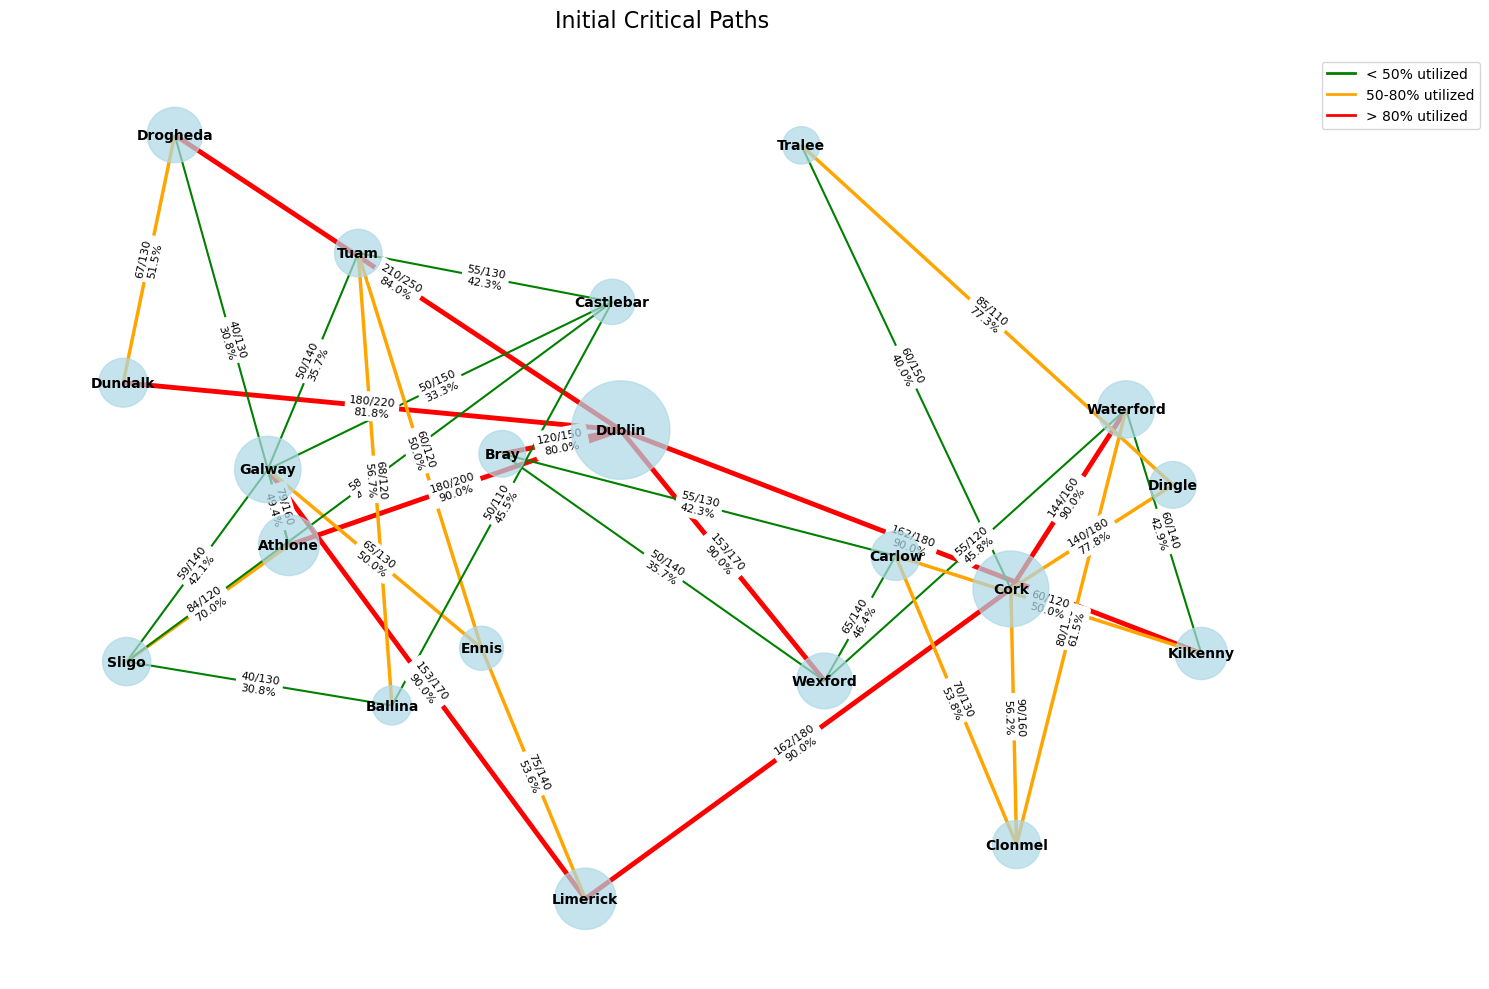


Optimized Network Analysis

Optimized Network Statistics
Total number of routes: 36
Total network flow: 3682
Total network capacity: 5320
Overall network utilization: 69.2%
Number of congested routes: 7

Congested routes:
Dublin -> Drogheda: 100.0% utilized
Dublin -> Dundalk: 100.0% utilized
Dublin -> Athlone: 87.0% utilized
Dublin -> Kilkenny: 100.0% utilized
Dublin -> Wexford: 96.5% utilized
Dublin -> Bray: 82.0% utilized
Waterford -> Clonmel: 83.8% utilized


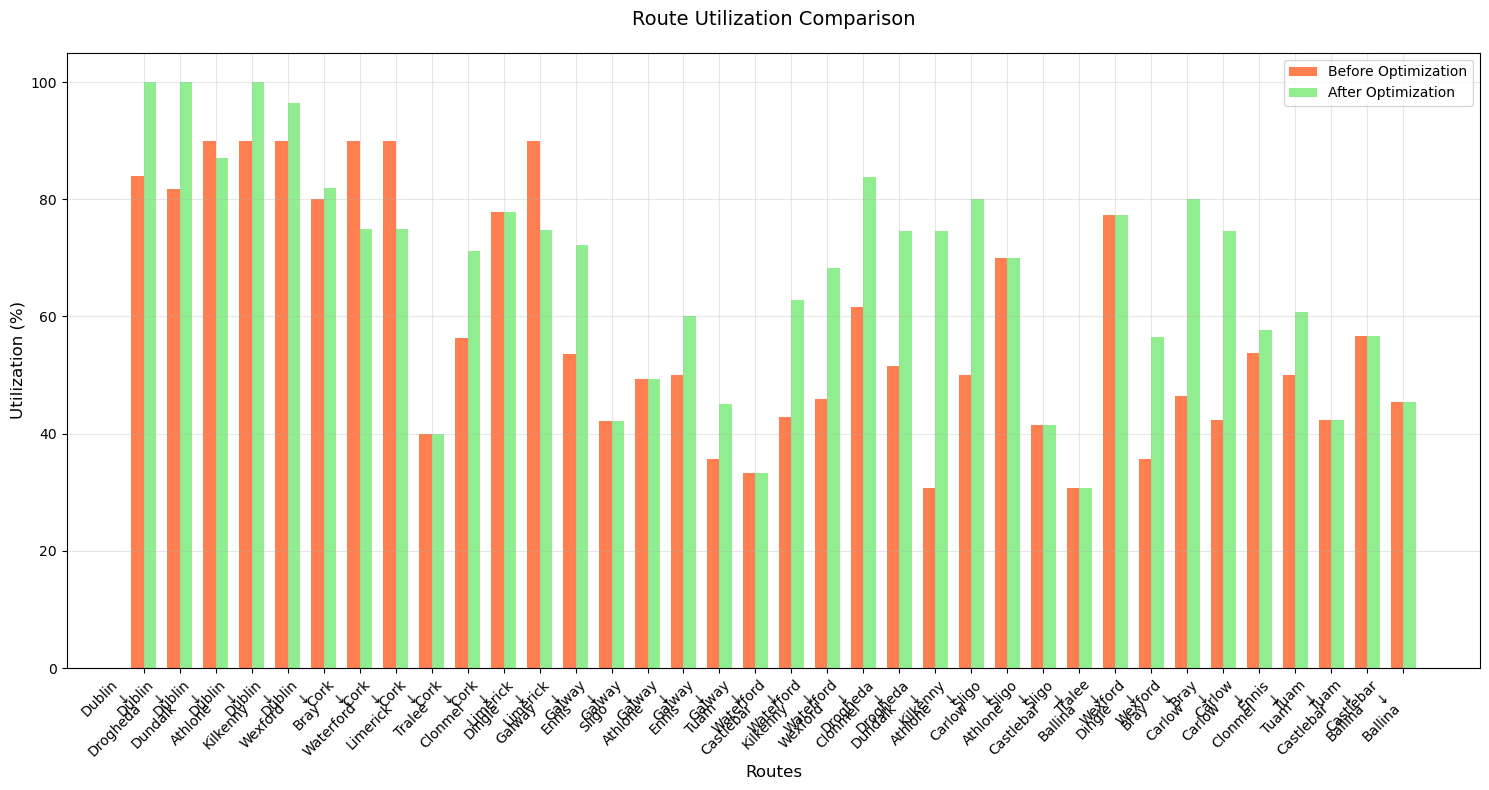

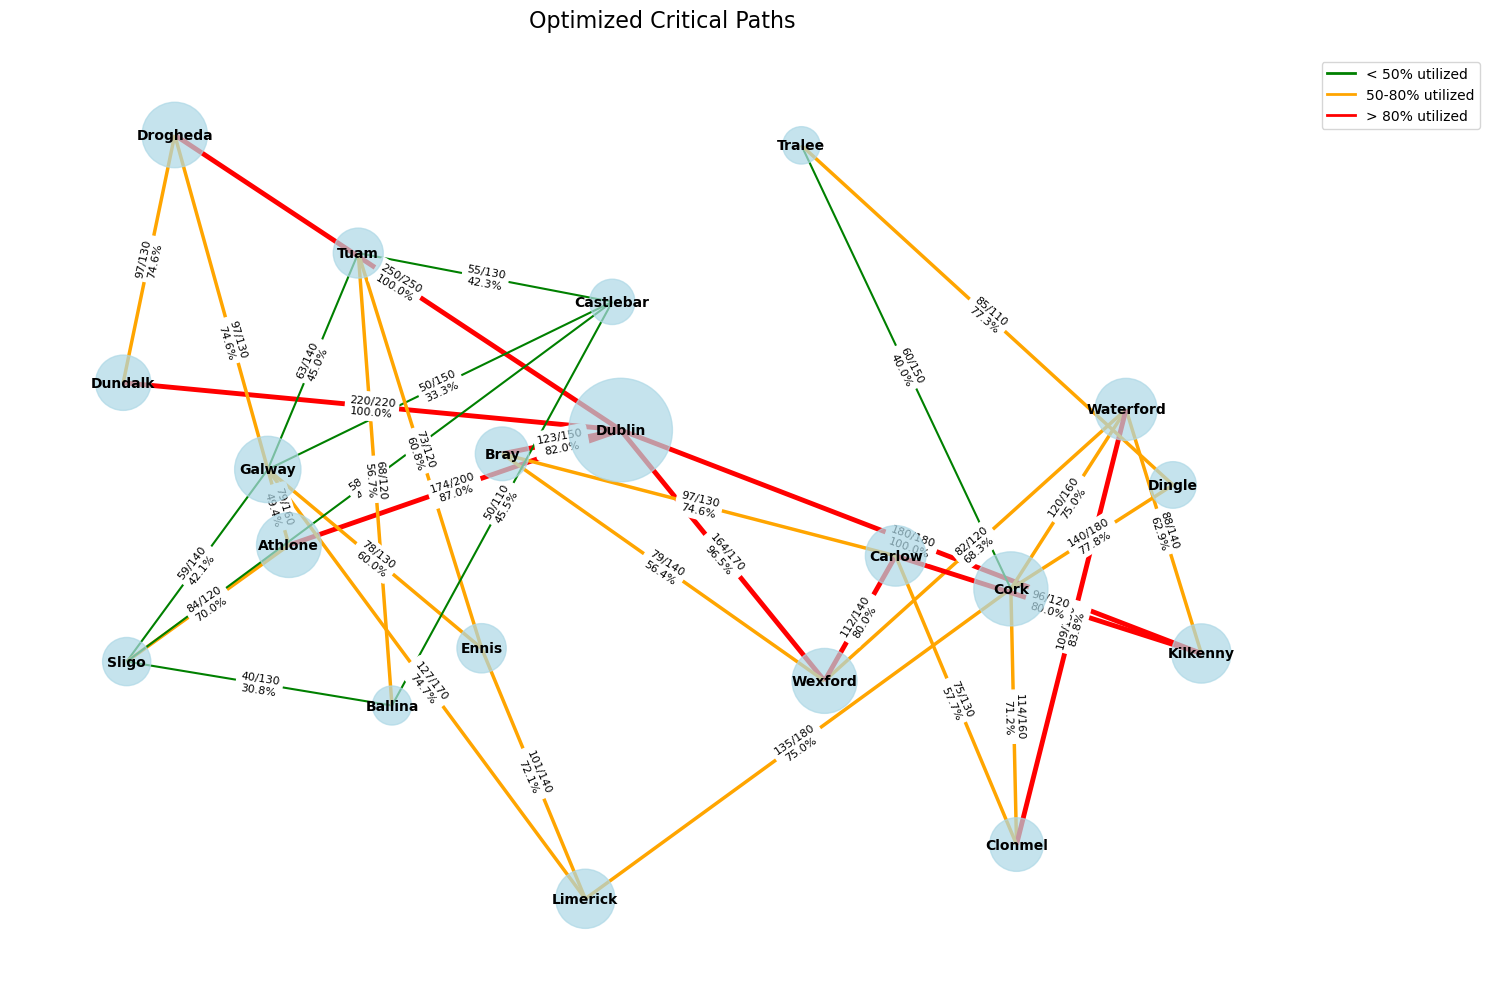

In [38]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Define 12 Irish cities
irish_cities = [
    'Dublin', 'Cork', 'Limerick', 'Galway', 'Waterford', 'Drogheda',
    'Kilkenny', 'Sligo', 'Tralee', 'Athlone', 'Wexford', 'Dundalk'
]

def create_traffic_network():
    G = nx.Graph()
    
    # Add nodes (cities) with specific traffic loads
    city_loads = {
        'Dublin': 200,    # Capital city
        'Cork': 150,      # Second largest city
        'Limerick': 120,  # Major western city
        'Galway': 130,    # Western hub
        'Waterford': 100, # Southeastern city
        'Drogheda': 90,   # Northern commuter town
        'Kilkenny': 85,   # Medieval city
        'Sligo': 80,      # Northwestern hub
        'Tralee': 75,     # Kerry hub
        'Athlone': 95,    # Central hub
        'Wexford': 85,    # Southeastern port
        'Bray': 70,     # Border town
        'Carlow': 60,     # Border town
        'Dundalk': 88,     # Border town
        'Clonmel': 70,     # Border town
        'Ennis': 80,     # Border town
        'Tuam': 65,     # Border town
        'Castlebar': 85,     # Border town
        'Ballina': 75,     # Border town
        'Dingle': 65     # Border town
    }
    
    for city, load in city_loads.items():
        G.add_node(city, traffic_load=load)
    
    # Add edges (roads) with specific capacities and flows
    # Format: (city1, city2, capacity, current_flow)
    road_data = [
         # Major Dublin routes
        ('Dublin', 'Drogheda', 250, 210),    # M1 route
        ('Dublin', 'Dundalk', 220, 180),     # M1 extension
        ('Dublin', 'Athlone', 200, 180),     # M4/N4 route
        ('Dublin', 'Kilkenny', 180, 162),    # M9/N9 route
        ('Dublin', 'Wexford', 170, 153),     # M11/N11 route
        
         # Major inter-city routes
        ('Cork', 'Waterford', 160, 144),     # N25 route
        ('Cork', 'Limerick', 180, 162),      # N20 route
        ('Limerick', 'Galway', 170, 153),    # M18 route
        
         # Other routes  
        ('Cork', 'Tralee', 150, 60),        # N22 route
        ('Galway', 'Sligo', 140, 59),        # N17 route
        ('Galway', 'Athlone', 160, 79),     # M6 route
        ('Waterford', 'Kilkenny', 140, 60), # N9 route
        ('Waterford', 'Wexford', 120, 55),   # N25 route
        ('Drogheda', 'Dundalk', 130, 67),    # M1 section
        ('Drogheda', 'Athlone', 130, 40),    # N51 route
        ('Sligo', 'Athlone', 120, 84)        # N4 route
    ]
        
    additional_road_data = [
    # Connections from/to Bray
        ('Dublin', 'Bray', 150, 120),      # N11 route
        ('Bray', 'Wexford', 140, 50),      # N11 South route
        ('Bray', 'Carlow', 130, 55),       # R755/N81 route
    
    # Connections from/to Carlow
        ('Carlow', 'Kilkenny', 120, 60),   # N9 route
        ('Carlow', 'Wexford', 140, 65),    # N80/N11 route
        ('Carlow', 'Clonmel', 130, 70),    # N9/N76 route
    
    # Connections from/to Clonmel
        ('Clonmel', 'Waterford', 130, 80), # N24 route
        ('Clonmel', 'Cork', 160, 90),     # N24/N8 route
    
    # Connections from/to Ennis
        ('Ennis', 'Limerick', 140, 75),   # N18 route
        ('Ennis', 'Galway', 130, 65),      # N18 North route
        ('Ennis', 'Tuam', 120, 60),        # N17 route
        
    # Connections from/to Tuam
        ('Tuam', 'Galway', 140, 50),      # N17 South route
        ('Tuam', 'Castlebar', 130, 55),    # N17 North route
        ('Tuam', 'Ballina', 120, 68),      # N17/N26 route
    
    # Connections from/to Castlebar
        ('Castlebar', 'Ballina', 110, 50), # N26 route
        ('Castlebar', 'Sligo', 140, 58),  # N17/N5 route
        ('Castlebar', 'Galway', 150, 50), # N84 route
    
    # Connections from/to Ballina
        ('Ballina', 'Sligo', 130, 40),     # N59 route
    
    # Connections from/to Dingle
        ('Dingle', 'Tralee', 110, 85),     # N86 route
        ('Dingle', 'Cork', 180, 140)       # N86/N22 route
    ]

    # Combine with existing road_data
    road_data.extend(additional_road_data)

    for city1, city2, capacity, flow in road_data:
        G.add_edge(city1, city2, capacity=capacity, current_flow=flow)
    
    return G

def plot_utilization_comparison(G_before, G_after):
    """Create a bar chart comparing route utilization before and after optimization"""
    routes = list(G_before.edges())
    utilization_before = []
    utilization_after = []
    
    for route in routes:
        util_before = (G_before[route[0]][route[1]]['current_flow'] / 
                      G_before[route[0]][route[1]]['capacity']) * 100
        util_after = (G_after[route[0]][route[1]]['current_flow'] / 
                     G_after[route[0]][route[1]]['capacity']) * 100
        utilization_before.append(util_before)
        utilization_after.append(util_after)
    
    plt.figure(figsize=(15, 8))
    x = np.arange(len(routes))
    width = 0.35
    
    plt.bar(x - width/2, utilization_before, width, label='Before Optimization', color='coral')
    plt.bar(x + width/2, utilization_after, width, label='After Optimization', color='lightgreen')
    
    plt.xlabel('Routes', fontsize=12)
    plt.ylabel('Utilization (%)', fontsize=12)
    plt.title('Route Utilization Comparison', pad=20, fontsize=14)
    plt.xticks(x, [f'{r[0]}\n↓\n{r[1]}' for r in routes], rotation=45, ha='right')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def plot_critical_paths(G, title):
    """Visualize critical paths with high utilization"""
    pos = nx.spring_layout(G, k=1.3, iterations=50, seed=42)
    
    plt.figure(figsize=(15, 10))
    plt.title(title, pad=20, size=16)
    
    # Draw nodes with size based on total traffic
    node_traffic = {node: sum(G[node][neighbor]['current_flow'] 
                            for neighbor in G[node]) 
                   for node in G.nodes()}
    node_sizes = [node_traffic[node] * 5 for node in G.nodes()]
    
    # Create custom colormap for edges based on utilization
    edge_colors = []
    edge_widths = []
    for (u, v) in G.edges():
        utilization = G[u][v]['current_flow'] / G[u][v]['capacity']
        if utilization < 0.5:
            edge_colors.append('green')
            edge_widths.append(1.5)
        elif utilization < 0.8:
            edge_colors.append('orange')
            edge_widths.append(2.5)
        else:
            edge_colors.append('red')
            edge_widths.append(3.5)
    
    # Draw the network
    nx.draw_networkx_nodes(G, pos, node_color='lightblue',
                          node_size=node_sizes, alpha=0.7)
    nx.draw_networkx_edges(G, pos, edge_color=edge_colors,
                          width=edge_widths)
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')
    
    # Add edge labels
    edge_labels = {(u, v): f'{G[u][v]["current_flow"]}/{G[u][v]["capacity"]}\n{(G[u][v]["current_flow"]/G[u][v]["capacity"]*100):.1f}%'
                  for (u, v) in G.edges()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=8)
    
    # Add legend
    legend_elements = [
        plt.Line2D([0], [0], color='green', lw=2, label='< 50% utilized'),
        plt.Line2D([0], [0], color='orange', lw=2, label='50-80% utilized'),
        plt.Line2D([0], [0], color='red', lw=2, label='> 80% utilized')
    ]
    plt.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1))
    
    plt.axis('off')
    plt.tight_layout()
    plt.show()

def optimize_traffic_flow(G):
    """Optimize traffic flow in the network"""
    def find_alternative_paths(G, start, end, max_depth=3):
        paths = []
        def dfs(current, target, path, depth):
            if depth > max_depth:
                return
            if current == target:
                paths.append(path)
                return
            for neighbor in G[current]:
                if neighbor not in path:
                    dfs(neighbor, target, path + [neighbor], depth + 1)
        dfs(start, end, [start], 0)
        return [p for p in paths if len(p) > 2]  # Only return indirect paths

    G_opt = G.copy()
    
    for (start, end) in list(G_opt.edges()):
        current_flow = G_opt[start][end]['current_flow']
        capacity = G_opt[start][end]['capacity']
        
        if current_flow > capacity * 0.8:
            # Calculate excess traffic
            target_flow = int(capacity * 0.75)
            excess_traffic = current_flow - target_flow
            G_opt[start][end]['current_flow'] = target_flow
            
            # Find alternative paths
            alt_paths = find_alternative_paths(G_opt, start, end)
            viable_paths = []
            
            # Calculate available capacity for each alternative path
            for path in alt_paths:
                min_available_capacity = float('inf')
                for i in range(len(path)-1):
                    edge_capacity = G_opt[path[i]][path[i+1]]['capacity']
                    edge_flow = G_opt[path[i]][path[i+1]]['current_flow']
                    available = edge_capacity - edge_flow
                    min_available_capacity = min(min_available_capacity, available)
                
                if min_available_capacity > 0:
                    viable_paths.append((path, min_available_capacity))
            
            # Distribute excess traffic more precisely
            if viable_paths:
                traffic_per_path = excess_traffic // len(viable_paths)
                remainder = excess_traffic % len(viable_paths)
                
                for i, (path, available_capacity) in enumerate(viable_paths):
                    extra = 1 if i < remainder else 0
                    traffic_to_add = min(traffic_per_path + extra, available_capacity)
                    
                    for j in range(len(path)-1):
                        G_opt[path[j]][path[j+1]]['current_flow'] += traffic_to_add
    
    return G_opt

def print_network_statistics(G, title):
    """Print detailed network statistics"""
    print(f"\n{title}")
    print("=" * 50)
    print(f"Total number of routes: {len(G.edges())}")
    
    total_flow = sum(G[u][v]['current_flow'] for u, v in G.edges())
    total_capacity = sum(G[u][v]['capacity'] for u, v in G.edges())
    
    print(f"Total network flow: {total_flow}")
    print(f"Total network capacity: {total_capacity}")
    print(f"Overall network utilization: {(total_flow/total_capacity)*100:.1f}%")
    
    congested_routes = [(u, v) for u, v in G.edges() 
                       if G[u][v]['current_flow']/G[u][v]['capacity'] > 0.8]
    print(f"Number of congested routes: {len(congested_routes)}")
    
    if congested_routes:
        print("\nCongested routes:")
        for u, v in congested_routes:
            util = (G[u][v]['current_flow']/G[u][v]['capacity'])*100
            print(f"{u} -> {v}: {util:.1f}% utilized")

# Main execution
if __name__ == "__main__":
    # Create initial network
    G_initial = create_traffic_network()
    
    # Store a copy of initial state
    G_before = G_initial.copy()
    
    print("\nInitial Network Analysis")
    print_network_statistics(G_before, "Initial Network Statistics")
    
    # Create visualizations for initial state
    # create_traffic_heatmap(G_before, "Initial Traffic Flow Heatmap")
    plot_critical_paths(G_before, "Initial Critical Paths")
    
    # Optimize network
    G_after = optimize_traffic_flow(G_initial)
    
    print("\nOptimized Network Analysis")
    print_network_statistics(G_after, "Optimized Network Statistics")
    
    # Create visualizations for comparison
    plot_utilization_comparison(G_before, G_after)
    plot_critical_paths(G_after, "Optimized Critical Paths")